coefficient of determination: 0.802698464182076
intercept: 4.192634560906509
slope: [0.61104816]
[ 7.24787535 13.35835694 19.46883853 25.57932011 31.6898017  37.80028329
 40.85552408]


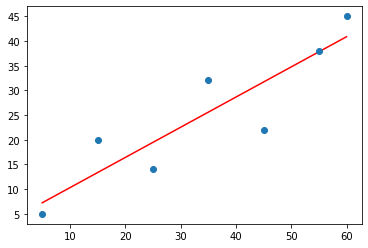

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.array([5, 15, 25, 35, 45, 55, 60]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38, 45])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print("coefficient of determination:", r_sq)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = model.predict(x)
print (y_pred)
plt.plot(x, y_pred, 'red')
plt.plot(x, y, 'o')


In [39]:
x_new = np.arange(5).reshape((5, 1))
x_new
y_new = model.predict(x_new)
y_new


array([4.19263456, 4.80368272, 5.41473088, 6.02577904, 6.6368272 ])

In [48]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_
y_pred = model.predict(x_)
print (r_sq)
print (model.intercept_, model.coef_)
print (x_)
print (y_pred)


0.8908516262498563
21.372321428571453 [-1.32357143  0.02839286]
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [56]:
import statsmodels.api as sm
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x
y
x = sm.add_constant(x)
x
model = sm.OLS(y, x)
results = model.fit()
results.summary()

C:\python\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 17 May 2022   Prob (F-statistic):            0.00713
Time:                        17:29:55   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results.fittedvalues

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [73]:
import pandas as pd

dtypes = {
    "first_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}
df = pd.read_csv(
    "legislators-historical.csv",
    dtype=dtypes,
    usecols=list(dtypes) + ["birthday", "last_name"],
    parse_dates=["birthday"]
)
print (df.tail())
df.dtypes
n_by_state = df.groupby("state")["first_name"].count()
n_by_state.head(10)

         last_name first_name   birthday gender type state       party
12050     Hagedorn        Jim 1962-08-04      M  rep    MN  Republican
12051        Young        Don 1933-06-09      M  rep    AK  Republican
12052  Fortenberry       Jeff 1960-12-27      M  rep    NE  Republican
12053         Vela    Filemon 1963-02-13      M  rep    TX    Democrat
12054         Reed        Tom 1971-11-18      M  rep    NY  Republican


state
00229      1
00322      1
00778      1
02066      1
02293      1
AK        17
AL       209
AR       116
AS         2
AZ        46
Name: first_name, dtype: int64

In [74]:
df.groupby(["state", "gender"])["last_name"].count()

state  gender
00229  F           0
       M           0
00322  F           0
       M           0
00778  F           0
                ... 
WI     M         197
WV     F           1
       M         118
WY     F           1
       M          38
Name: last_name, Length: 126, dtype: int64

In [75]:
df.groupby(["state", "gender"], as_index=False)["last_name"].count()

,state,gender,last_name
0,00229,F,0
1,00229,M,0
2,00322,F,0
3,00322,M,0
4,00778,F,0
...,...,...,...
121,WI,M,197
122,WV,F,1
123,WV,M,118
124,WY,F,1


In [81]:
by_state = df.groupby("state")
by_state.get_group("PA")

,last_name,first_name,birthday,gender,type,state,party
4,Clymer,George,1739-03-16,M,rep,PA,NaN
19,Maclay,William,1737-07-20,M,sen,PA,Anti-Administration
21,Morris,Robert,1734-01-20,M,sen,PA,Pro-Administration
27,Wynkoop,Henry,1737-03-02,M,rep,PA,NaN
38,Jacobs,Israel,1726-06-09,M,rep,PA,NaN
...,...,...,...,...,...,...,...
11887,Brady,Robert,1945-04-07,M,rep,PA,Democrat
11926,Shuster,Bill,1961-01-10,M,rep,PA,Republican
11938,Rothfus,Keith,1962-04-25,M,rep,PA,Republican
11952,Costello,Ryan,1976-09-07,M,rep,PA,Republican


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow

  Using cached tensorflow-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)
     -------------------------------------- 14.2/14.2 MB 569.7 kB/s eta 0:00:00
     ------------------------------------ 904.1/904.1 kB 566.4 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 507.9 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 570.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 438.7/438.7 kB 527.0 kB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 295.4 kB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 572.0 kB/s eta 0:00:00
     ------------------------------------ 126.7/126.7 kB 531.6 kB/s eta 0:00:00
     ------------------

In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.0


In [24]:
from scipy.special import cbrt
cb = cbrt([27, 64])
#print value of cb
print(cb)
print (27**(1/3), 64**(1/3))
from scipy.special import exp10
#define exp10 function and pass value in its
exp = exp10([1,10,5, 50])
print(exp)
from scipy.special import comb
#find combinations of 5, 2 values using comb(N, k)
com = comb(5, 3, exact = False, repetition=True)
print(com)

[3. 4.]
3.0 3.9999999999999996
[1.e+01 1.e+10 1.e+05 1.e+50]
35.0


In [28]:
from scipy.special import perm
import scipy
#find permutation of 5, 2 using perm (N, k) function
per = perm(5, 3, exact = True)
print(per)
scipy.special.logsumexp([10, 10])

60


10.693147180559945

In [32]:
from scipy import linalg
import numpy as np
#define square matrix
two_d_array = np.array([ [4,6], [3,10] ])
#pass values to det() function
linalg.det( two_d_array )
linalg.eig(two_d_array )

(array([ 1.80384758+0.j, 12.19615242+0.j]),
 array([[-0.9390708 , -0.59069049],
        [ 0.34372377, -0.80689822]]))

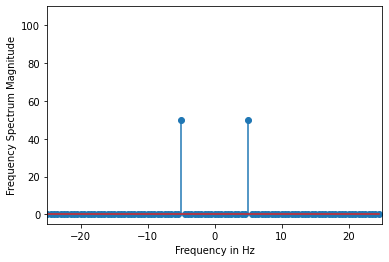

In [36]:
from scipy import fftpack
import matplotlib.pyplot as plt
fre  = 5
fre_samp = 50
t = np.linspace(0, 2, 2 * fre_samp, endpoint = False )
a = np.sin(fre  * 2 * np.pi * t)
A = fftpack.fft(a)
frequency = fftpack.fftfreq(len(a)) * fre_samp
figure, axis = plt.subplots()
axis.stem(frequency, np.abs(A))
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-fre_samp / 2, fre_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

In [45]:
t = np.linspace(0, 2, 2 * 50, endpoint = False )
print(t)
print (a)
np.sin(2*5*0.02*np.pi)
print (A)
print (abs(A))
fftpack.fftfreq(len(a))

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98]
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16  5.87785252e-01
  9.51056516e-01  9.51056516e-01  5.87785252e-01  3.67394040e-16
 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
 -4.89858720e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  6.12323400e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -7.3

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

In [3]:
#Prediction model using Sigmoid
import numpy as np
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2
prediction = make_prediction(input_vector, weights_1, bias)
print(f"The prediction result is: {prediction}")

target=0
error = np.square(prediction - target)

derivative = 2 * (prediction - target)
print(f"The derivative is {derivative}")

weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)
error = (prediction - target) ** 2
print(f"Prediction: {prediction}; Error: {error}")

The prediction result is: [0.7985731]
The derivative is [1.59714621]
Prediction: [0.02263394]; Error: [0.0005123]


In [3]:
from sklearn import datasets

wine = datasets.load_wine()
print(wine.DESCR)
print(wine.target_names)
print(wine.feature_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

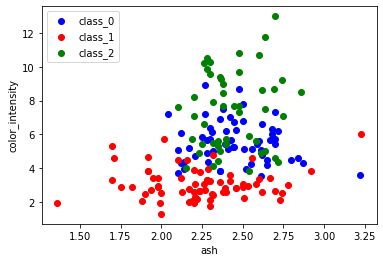

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()

features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]], 
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show() # wine dataset scatter plot

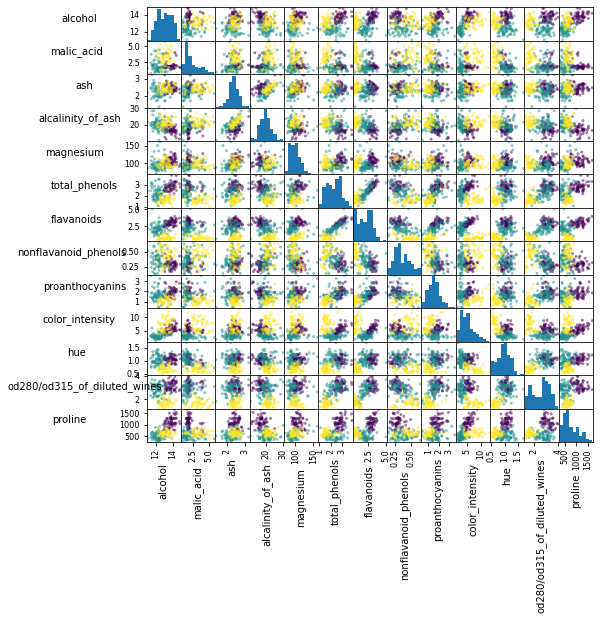

In [5]:
# scatter matrix of wine data set
import pandas as pd
from sklearn import datasets

wine = datasets.load_wine()
def rotate_labels(df, axes):
    """ changing the rotation of the label output, 
    y labels horizontal and x labels vertical """
    n = len(df.columns)
    for x in range(n):
        for y in range(n):
            # to get the axis of subplots
            ax = axs[x, y]
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = 50

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
axs = pd.plotting.scatter_matrix(wine_df, 
                                 c=wine.target, 
                                 figsize=(8, 8),
                                );

rotate_labels(wine_df, axs)

[1 3 1 3 1 3 2]


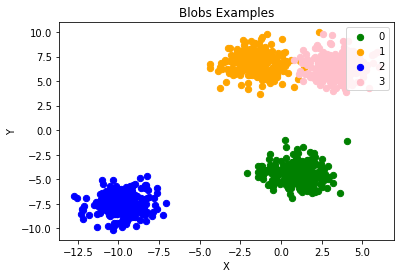

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_classes = 4
data, labels = make_blobs(n_samples=1000, 
                          centers=n_classes, 
                          random_state=100)

print (labels[:7])


#We will visualize the previously created blob custers with matplotlib:

# some blobs
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue', "pink")
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

In [34]:
import tensorflow as tf

a = tf.constant(5.0+8**2)
b = tf.constant(3.0)
c = a*b

print (a)

tf.Tensor(69.0, shape=(), dtype=float32)


In [19]:
print(tf.__version__)

2.9.0


In [13]:
import numpy as np
import statsmodels.api as sm
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
print (X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e
print (y)
results = sm.OLS(y, X).fit()
print(results.summary())
print (results)

[[1.00000000e+00 4.56271484e-01 6.30180641e-01]
 [1.00000000e+00 9.99768235e-01 7.93261257e-01]
 [1.00000000e+00 2.19871901e-01 3.97378448e-01]
 [1.00000000e+00 7.36156149e-01 2.32251838e-01]
 [1.00000000e+00 7.21635516e-01 6.99876276e-01]
 [1.00000000e+00 1.40283276e-01 4.99024428e-01]
 [1.00000000e+00 5.32432447e-02 9.36055874e-01]
 [1.00000000e+00 6.87457251e-01 5.12077679e-01]
 [1.00000000e+00 2.74769051e-01 7.95597587e-02]
 [1.00000000e+00 6.57522853e-01 2.15866990e-01]
 [1.00000000e+00 1.49241895e-01 9.03559900e-01]
 [1.00000000e+00 6.08077091e-01 7.59376720e-01]
 [1.00000000e+00 9.96266704e-01 8.27044685e-01]
 [1.00000000e+00 3.70857587e-02 1.46001806e-01]
 [1.00000000e+00 6.58203130e-01 1.02661888e-01]
 [1.00000000e+00 4.22517527e-01 3.26809102e-01]
 [1.00000000e+00 6.14318858e-01 6.62655077e-02]
 [1.00000000e+00 5.60163761e-01 5.41182345e-01]
 [1.00000000e+00 4.59593574e-01 9.79495201e-01]
 [1.00000000e+00 5.29413175e-01 3.86026754e-01]
 [1.00000000e+00 7.50091741e-01 8.389094

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print (x_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(10000, 28, 28, 1)


In [17]:
x_train
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 52s 119ms/step - loss: 0.3622 - accuracy: 0.8891 - val_loss: 0.0849 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 51s 122ms/step - loss: 0.1106 - accuracy: 0.9663 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 50s 119ms/step - loss: 0.0838 - accuracy: 0.9742 - val_loss: 0.0493 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 52s 122ms/step - loss: 0.0725 - accuracy: 0.9773 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 50s 119ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0400 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 49s 116ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 49s 116ms/step - loss: 0.0523 - accuracy: 0.9845 - val_loss: 0.0365 - val_ac

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02538195066154003
Test accuracy: 0.9905999898910522


In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

dataset = read_csv(url, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
dataset.describe()
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


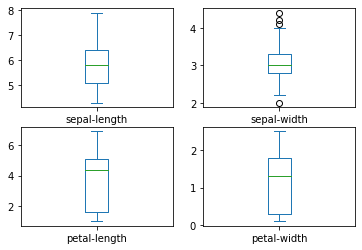

In [4]:
# Диаграмма размаха
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

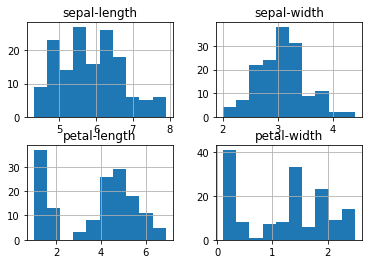

In [5]:
# Гистограмма распределения атрибутов датасета
dataset.hist()
pyplot.show()

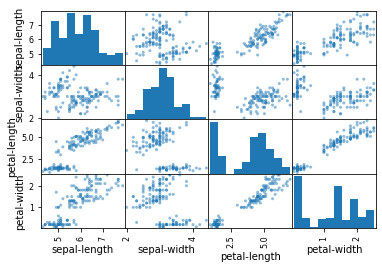

In [6]:
#Матрица диаграмм рассеяния
scatter_matrix(dataset)
pyplot.show()

In [7]:
# Разделение датасета на обучающую и контрольную выборки
array = dataset.values

# Выбор первых 4-х столбцов 
X = array[:,0:4]

# Выбор 5-го столбца 
y = array[:,4]

# Разделение X и y на обучающую и контрольную выборки 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [8]:
# Загружаем алгоритмы модели
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


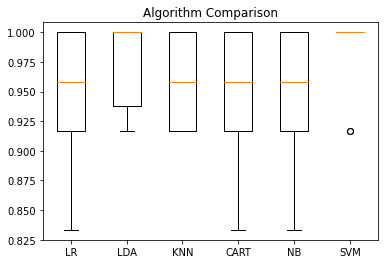

In [9]:
# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

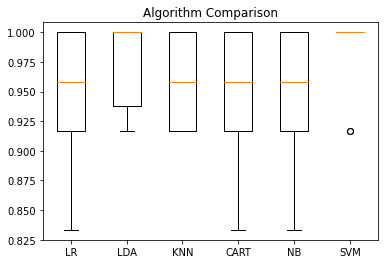

In [10]:
# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [12]:
# Создаем прогноз на контрольной выборке
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [13]:
# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [38]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

dataset = pd.read_csv('C:/Users/Аслан/Desktop/pima-indians-diabetes.data.csv', delimiter=',')
print (dataset)
arr=np.array(dataset)
X = arr[:,0:8]
y = arr[:,8]


      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


In [40]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 2s 4ms/step - loss: 3.1850 - accuracy: 0.6284
Epoch 2/150
77/77 [==============================] - 0s 4ms/step - loss: 1.6219 - accuracy: 0.6480
Epoch 3/150
77/77 [==============================] - 0s 4ms/step - loss: 1.2548 - accuracy: 0.6258
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 1.0294 - accuracy: 0.6050
Epoch 5/150
77/77 [==============================] - 0s 5ms/step - loss: 0.9641 - accuracy: 0.6232
Epoch 6/150
77/77 [==============================] - 0s 5ms/step - loss: 1.0093 - accuracy: 0.6245
Epoch 7/150
77/77 [==============================] - 0s 4ms/step - loss: 0.8783 - accuracy: 0.6245
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.6467
Epoch 9/150
77/77 [==============================] - 0s 4ms/step - loss: 0.8680 - accuracy: 0.6467
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7775 - accuracy: 0.6532
Epoch 11/

77/77 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7549
Epoch 84/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7497
Epoch 85/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7705
Epoch 86/150
77/77 [==============================] - 0s 5ms/step - loss: 0.5077 - accuracy: 0.7666
Epoch 87/150
77/77 [==============================] - 0s 4ms/step - loss: 0.4982 - accuracy: 0.7679
Epoch 88/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4955 - accuracy: 0.7705
Epoch 89/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7471
Epoch 90/150
77/77 [==============================] - 0s 3ms/step - loss: 0.4961 - accuracy: 0.7771
Epoch 91/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7549
Epoch 92/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7588
Epoch 93/150


In [44]:
# evaluate the keras model
_,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7797
Accuracy: 77.97


1
